<a href="https://colab.research.google.com/github/shernee/04_cmpe258/blob/master/258_Asmt1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import pandas as pd

Text classification

In [5]:
from fastai.text.all import *

In [6]:
text_raw = pd.read_csv('/content/drive/MyDrive/258_data/mental_health.csv')
text_raw.head()

,text,label
0,dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math,0
1,nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself,1
2,music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssongs,0
3,im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost take meds go therapy nothing seems help enough dont want around anymore hate feeling like this wouldnt wish upon enemy brain feels like constantly like static tv wont shut overthinking do think im running options dont see living past got accepted health science degree dont even know wanna try know im smart mental illness holds back think cant anything im good enough need fucking help dont know anymore ive run options,1
4,worried year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl years lives uk live different country kept touch electronic means first girl schizophrenic host illnesses too dad severe anger issues abuses physically mentally makes serve food wash dishes clean house shouts beats petty things like spilling water picking toys floor threatened knife beats plates glasses punches head last time got beat around month ago one siblings gets beat up tried tell mother beating showed bruises too mother refuses believe even lau...,1


1 - comment considered to be poisonous/mental health issues, 0 - not considered

In [7]:
dls = TextDataLoaders.from_df(text_raw, valid_pct=0.2, text_col=0, label_col=1)
dls.show_batch(max_n=5)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


,text,category
0,xxbos slipping cracks testimony subhuman early twenties slipping cracks introduction first class degree stem subject merit masters degree practical engineering subject whilst university served committee chess society treasurer one year president another xxunk another society also completed work placement part module specifically tailored towards career development throughout four years university xxunk academic personal interests significantly developed host xxunk skills chose modules gave broad understanding different issues was nt xxunk could maintain xxunk academic perspective developed practical laboratory field skills took modules statistics spare time read deeply philosophy specifically moral philosophy epistemology philosophy science history studied physics mathematics best amateur ability learned code designed scratch model simulate life cycle stars even began learning another language stop taking lessons became expensive maintain alongside this obtained job far beyond comfort zone can not xxunk xxunk distance chose do retail customer service spent around hours week working job whilst xxunk running two societies boot,1
1,xxbos failed would like read hell kill xxunk start beginning age almost dropped high school finally free kind filthy wasting time institution filled monkeys classmates decaying structures absent teachers nation really point thus decided get involved people either decay rest projecting life end december would ve three months firsts april always suffered kind depression since xxunk never really gave care always found reason mind stronger along fact never really cared social priority thus getting people youngsters around age follow would ve explained path political projects would like talk here may sound strange nation situation that s every single child despise interest seems forced bear understand order survive behaviour well finally thought would ve free live selftaught xxunk throught always believed best xxunk type xxunk circumstance able study whatever needed projects kind xxunk perhaps even graduating high school xxunk years giving exam selftaught possible even though really seems xxunk anymore here,1
2,xxbos suicidal heres personal story i m even world think am think probably xxunk part feel free skip tldr i ve accused suicidal since high school friend mine committed redflag boarding school soon after accused suicidal ideation school wanted remove remaining sinners i atheist religious school prior foster care attacked daily abusive foster mother accused foster children xxunk made public grabs attention for foster parent apparent disabled children bullied school held back segregated classroom sat alone room till state shut program down brought back normal schooling segregated due bullying eventually sent religious boarding school foster parents started watching crime programs started reading biased psychology books got pretty weird ideas heads attacks children increased teenage xxunk sign xxunk bullied made loner therefore psychopath thing bullied affluent teachers found foster care rejecting religious xxunk made xxunk meditation to cope abuse type xxunk anxious around violent attacks proved disorganized thinking and attacked violently,1
3,xxbos really know anymore xxunk really got get out know anymore i ve odds mother years bit backstory set mood this i m prone bit nasty quick temper sometimes oddball mindset i ve grown notion ca nt treat others respect deserve mine treat others want treated basically believe respect something earn others effort hard work ca nt force someone give manners something entirely different everyone those i m yearold soon still lives mother i m unable drive due deathly fear driving i ve literally ripped steering wheel hands try pushing car away someone driving carelessly got close car multiple times before suffer severe depression therapist believes ptsd from poor family xxunk parent since little involved major accident younger caused severe brain damage b

In [8]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
# learn.fine_tune(1)

In [9]:
learn.show_results()

,text,category,category_
0,xxbos lost xxunk posted xxunk subreddit found would appropriate post here i m i m sure begin i m scared know do now friend one person a redflag hotline worker knew situation now know friend girl i ve known two years knew internet know why never able make friends one would talk me one wanted talk me friend never really understood importance relevance human interaction met her much fun talking her enjoying others company never realised much fun talk someone never realised big world really was confess perhaps xxunk unhealthy attachment her time year met alone finished college course stopped going work family went vacation like months always thought certain tolerance social isolation wrong leave home except buy food internet front me never approached people it real life one girl always reached me always initiated conversations confused first little annoyed isolation getting worse anyone talked me led believe one cared,1,1
1,xxbos match tag team table match bubba ray spike dudley vs eddie guerrero chris benoit bubba ray spike dudley started things tag team table match eddie guerrero chris benoit according rules match opponents go tables order get win benoit guerrero heated early taking turns hammering first spike bubba ray german xxunk benoit bubba took wind dudley brother spike tried help brother referee restrained benoit guerrero ganged corner benoit stomping away bubba guerrero set table outside spike dashed ring xxunk top rope onto guerrero outside recovering taking care spike guerrero slipped table ring helped wolverine set up xxunk set double xxunk middle rope would put bubba table spike knocked table right brother came crashing down guerrero benoit propped another table corner tried irish whip spike it bubba dashed blocked brother bubba caught fire lifted opponents back body drops bubba slammed guerrero spike stomped wolverine top rope bubba held benoit bay spike,0,1
2,xxbos tried mdma best friend first time yesterday bad trip ended telling everything made unhappy life feel like courage commit xxunk along story boring okay do nt read it do nt mind called happy pills tried girlfriend said nice experience asked wanted try knows sad time convinced easily genuinely excited feel happiness fun time best friend told start one pill but minutes hour later nothing happening took another one later one half minutes later started panicking going heart attack like feeling ten times worse usual going insane lying bed left side clenching muscles felt like eternity could nt stop rubbing right foot left one ended tearing skin friend starting comfort me telling sorry was should ve known better genuinely felt bad could tell was nt clenching teeth telling terrified was kept biting inside cheek hard could almost felt good noticed saw bloody teeth helped drink water told important state two,1,1
3,xxbos need xxunk ampxb need talk english mother tong ill try say things me need write somewhere alone anyone tell even someone talk would think pieces years since life look like real life struggle keeping job struggle girls lost friends tried help xxunk happened kept stupid shit nonsensical stuff ampxb i m almost perfect life mean everything money friends time girl normal mental health felt sometimes bit unconfortable like alone even surrounded friends family happened dad felt sick mental illness nothing do xxunk stupid lets say xxunk doctors said years live ok hard year grandpa died loved him year break long relationship girl hard too became get down last year master th year mom left dad sister could nt handle converted islam problems years could nt find place life struggled school religion helped immensely way radical wanted full islamic like kind religious veil that way talk like normal person since,1,1
4,xxbos lyrics hitting hard reason living gone idk much longer keep xxunk important girl months ago depressed suicidal ever since songs nowadays great love badly someone broke someones heart happy love songs kill know ill neve

Image classification

In [ ]:
from fastai.vision.all import *

In [ ]:
def label_func(file): return file[:5] 
path = '/content/drive/MyDrive/258_data/road_images'
files = get_image_files(path=path)

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

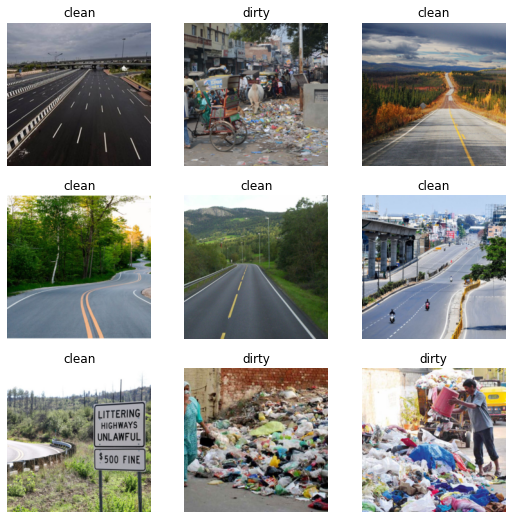

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.080636,0.614923,0.297872,00:53


epoch,train_loss,valid_loss,error_rate,time
0,0.576089,0.202260,0.085106,01:18


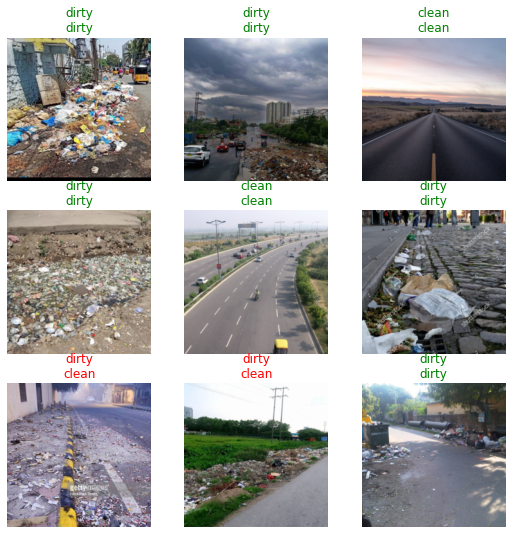

In [ ]:
learn.show_results()

Segmentation

In [ ]:
def label_func(file): return file[:5] 
path = '/content/drive/MyDrive/258_data/road_images'
files = get_image_files(path=path)

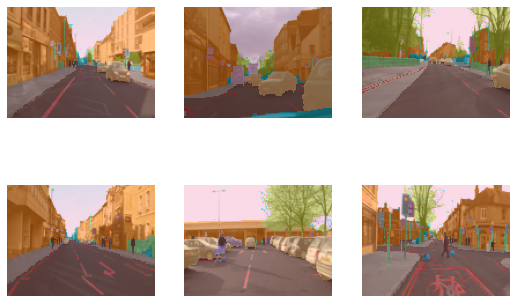

In [ ]:
path = untar_data(URLs.CAMVID_TINY)

fnames = get_image_files(path/"images")

codes = np.loadtxt(path/'codes.txt', dtype=str)

def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes = codes
)

dls.show_batch(max_n=6)

In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,2.649911,2.040215,01:06


epoch,train_loss,valid_loss,time
0,1.557083,2.367019,01:10
1,1.545448,1.343845,01:12
2,1.389420,1.089944,01:13


epoch,train_loss,valid_loss,time
0,1.557083,2.367019,01:10
1,1.545448,1.343845,01:12
2,1.389420,1.089944,01:13
3,1.268453,1.043380,01:10


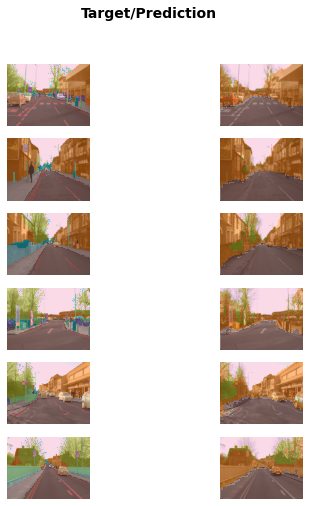

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

Tabular data

In [ ]:
from fastai.tabular.all import *

In [52]:
df_possum_raw = pd.read_csv('/content/drive/MyDrive/258_data/possum.csv')
df_possum_raw.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
df_possum_raw['hdlngth'].describe()

count    104.000000
mean      92.602885
std        3.573349
min       82.500000
25%       90.675000
50%       92.800000
75%       94.725000
max      103.100000
Name: hdlngth, dtype: float64

In [ ]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df_possum_raw))

possum_tabular = TabularPandas(df_possum_raw, procs=[Categorify, FillMissing],
                   cat_names = ['Pop', 'sex',],
                   cont_names = ['age', 'skullw', 'totlngth', 'taill', 'footlgth', 'eye', 'chest'],
                   y_names='hdlngth',
                   splits=splits)

In [ ]:
possum_tabular.xs.iloc[:2]

,Pop,sex,site,age_na,footlgth_na,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
75,2,2,6,1,1,5.0,56.799999,89.0,41.0,64.500000,46.400002,17.799999,26.0,33.0
59,2,1,4,1,1,2.0,57.700001,88.0,39.0,63.099998,47.000000,14.400000,26.0,30.0


In [ ]:
dls = possum_tabular.dataloaders(bs=64)

In [ ]:
dls.show_batch()

,Pop,sex,age_na,footlgth_na,age,skullw,totlngth,taill,footlgth,eye,chest,hdlngth
0,Vic,f,False,False,5.0,55.599998,92.0,35.5,71.699997,15.3,28.0,94.900002
1,other,m,False,False,4.0,56.599998,88.5,37.5,64.500000,14.9,27.0,91.599998
2,other,f,False,False,6.0,56.400002,88.5,38.0,64.099998,15.2,25.5,92.000000
3,Vic,m,False,False,3.0,55.900002,81.0,34.0,71.500000,14.6,27.0,90.699997
4,Vic,m,True,False,4.0,54.400002,84.0,35.0,72.800003,14.4,24.5,91.400002
5,Vic,f,False,False,2.0,54.400002,84.0,33.5,70.599998,14.5,24.5,92.099998
6,Vic,m,False,False,3.0,54.099998,77.0,32.0,62.700001,13.8,25.5,85.300003
7,Vic,f,False,False,5.0,55.400002,90.5,35.0,73.400002,15.2,28.0,94.400002
8,other,m,False,False,1.0,52.400002,80.5,35.0,62.000000,14.1,25.5,85.900002
9,other,m,False,False,5.0,68.599998,84.0,35.0,65.599998,14.5,28.5,93.199997


In [ ]:
learn = tabular_learner(dls=dls, metrics=accuracy, y_range=(82, 103))
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,18.618361,67.607567,0.000000,00:00


In [ ]:
learn.show_results()

,Pop,sex,age_na,footlgth_na,age,skullw,totlngth,taill,footlgth,eye,chest,hdlngth,hdlngth_pred
0,2.0,2.0,1.0,1.0,6.0,56.200001,84.000000,36.0,62.799999,16.200001,25.0,93.599998,86.232323
1,2.0,2.0,1.0,1.0,3.0,61.500000,93.699997,38.0,68.699997,16.400000,27.5,99.900002,85.743958
2,2.0,2.0,1.0,1.0,2.0,62.799999,96.000000,40.0,73.199997,14.700000,32.0,102.500000,85.459007
3,2.0,2.0,1.0,1.0,1.0,54.700001,82.500000,39.0,64.400002,14.000000,25.0,88.599998,86.156578
4,2.0,1.0,1.0,1.0,3.0,58.000000,90.500000,39.0,65.500000,16.000000,27.0,91.300003,85.979660
5,2.0,2.0,1.0,1.0,3.0,54.599998,80.500000,36.0,62.599998,16.299999,25.0,88.400002,86.413406
6,2.0,2.0,1.0,1.0,3.0,54.000000,82.000000,38.0,63.799999,12.800000,24.0,89.199997,86.111595
7,1.0,1.0,1.0,1.0,9.0,56.299999,91.500000,37.0,72.400002,15.500000,28.0,93.400002,85.380714
8,2.0,1.0,1.0,1.0,3.0,56.200001,86.500000,38.5,64.800003,14.000000,28.0,93.300003,86.081467


Collab learner

In [3]:
from fastai.collab import *

In [4]:
df_books_raw = pd.read_csv('/content/drive/MyDrive/258_data/book_details.csv')
df_ratings_raw = pd.read_csv('/content/drive/MyDrive/258_data/ratings.csv') 

In [7]:
df_books_raw.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m/41865.jpg,https://images.gr-assets.com/books/1361039443s/41865.jpg
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m/2657.jpg,https://images.gr-assets.com/books/1361975680s/2657.jpg
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m/4671.jpg,https://images.gr-assets.com/books/1490528560s/4671.jpg


In [9]:
df_ratings_raw.tail()

,book_id,user_id,rating
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5
981755,10000,51328,1


In [5]:
dls = CollabDataLoaders.from_df(df_ratings_raw, bs=64)

In [6]:
dls.show_batch()

,book_id,user_id,rating
0,6973,38173,4
1,88,12791,4
2,4041,6184,4
3,9004,30136,5
4,585,7824,4
5,8208,40149,4
6,1170,2553,4
7,7562,5176,4
8,7780,8204,3
9,8895,30318,4


In [7]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))

In [8]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,time
0,1.104839,1.081141,12:05
1,0.740053,0.774907,15:47


epoch,train_loss,valid_loss,time
0,1.104839,1.081141,12:05
1,0.740053,0.774907,15:47
2,0.638510,0.757156,14:31


In [9]:
g = df_ratings_raw.groupby('book_id')['rating'].count()
top_books = g.sort_values(ascending=False).index.values[:1000]
top_books[:10]

array([   1, 5198, 5215, 5214, 9803, 5211, 5210, 5209, 5207, 5206])